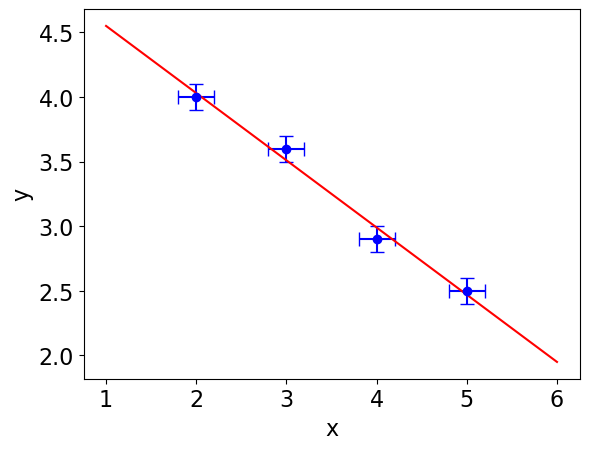

In [1]:
%pip install linregmc
import math
import numpy as np
import linregmc as mc
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as polynomial

plt.rc('font', size=16)

x=np.array([2.0, 3.0, 4.0, 5.0])
y=np.array([4.0,3.6,2.9,2.5])
xsig=0.2
ysig=0.1
xrange=np.array([1.0,6.0])
plt.errorbar(x,y,fmt='bo',xerr=xsig,yerr=ysig,capsize=5)
p=polynomial.polyfit(x,y,1)
plt.plot(xrange,polynomial.polyval(xrange,p),'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

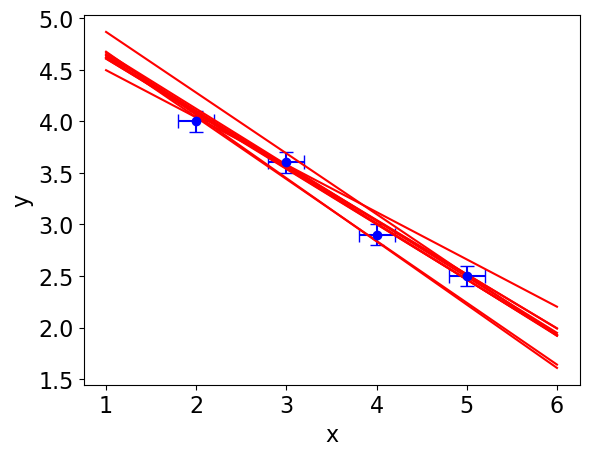

In [5]:
nmc=10000
xmc=mc.addnoise(x,xsig,nmc,'lognorm')
ymc=mc.addnoise(y,ysig,nmc,'lognorm')
pp,psig,pchi2,pmc=mc.linreg(xmc,ymc)
plt.errorbar(x,y,fmt='bo',xerr=xsig,yerr=ysig,capsize=5)
for i in range(10):
    plt.plot(xrange,polynomial.polyval(xrange,pmc[i,:]),'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [6]:
print("Goodness-of-fit: ", pchi2)

Goodness-of-fit:  0.6387


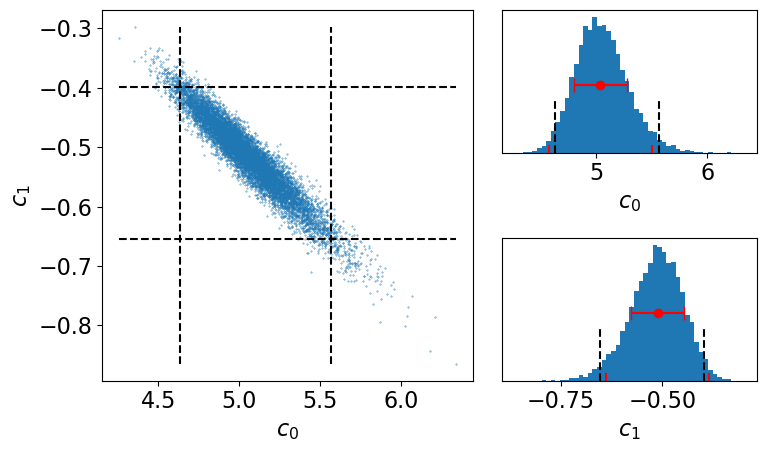

In [3]:
perr,confint=mc.confidence(pmc,0.95,plot=True)